# Load the data

In [1]:
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv("https://github.com/pvateekul/2110446_DSDE_2023s2/raw/main/code/Week03_ML/mushroom2020_dataset.csv")
df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


Answer Q1

In [36]:
# Count occurrences of "na" in the "gill-size" variable
na_count = df['gill-size'].eq('na').sum()

# Display the count
print("Count of 'na' in 'gill-size':", na_count)

Count of 'na' in 'gill-size': 0


In [39]:
print("Count of na in 'gill-size': ", df['gill-size'].isna().sum())

Count of na in 'gill-size':  121


In [2]:
df.shape

(5824, 24)

# Drop missing Label

In [3]:
# Drop rows where the label variable is missing
df2 = df.dropna(subset=['label'])
df2.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [4]:
df2.shape

(5764, 24)

# Drop other columns

In [5]:
# List of variables to drop
variables_to_drop = ['id', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color-rate',
                      'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                      'stalk-color-above-ring-rate', 'stalk-color-below-ring-rate',
                      'veil-color-rate', 'veil-type']

# Drop the specified variables
df3 = df2.drop(variables_to_drop, axis=1)
df3.head()

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
0,p,x,s,t,p,e,o,p,k,s,u,1.0
1,e,x,s,t,a,e,o,p,n,n,g,2.0
2,e,b,s,t,l,e,o,p,n,n,m,3.0
3,p,x,y,t,p,e,o,p,k,s,u,3.0
4,e,x,s,f,n,t,o,e,n,a,g,4.0


In [6]:
df3.shape

(5764, 12)

# Examine the data

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5764 entries, 0 to 5823
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              5764 non-null   object 
 1   cap-shape          5764 non-null   object 
 2   cap-surface        5737 non-null   object 
 3   bruises            5665 non-null   object 
 4   odor               5665 non-null   object 
 5   stalk-shape        5643 non-null   object 
 6   ring-number        5702 non-null   object 
 7   ring-type          5702 non-null   object 
 8   spore-print-color  5708 non-null   object 
 9   population         5708 non-null   object 
 10  habitat            5733 non-null   object 
 11  cap-color-rate     5737 non-null   float64
dtypes: float64(1), object(11)
memory usage: 585.4+ KB


In [8]:
df3.describe(include='all')

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
count,5764,5764,5737,5665,5665,5643,5702,5702,5708,5708,5733,5737.000000
unique,2,5,4,2,9,2,3,5,8,6,7,NaN
top,p,f,y,f,n,t,o,p,w,v,d,NaN
freq,3660,2382,2492,3843,2178,3225,5072,2324,2380,3491,2555,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.327523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.859218
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Answer Q2

In [25]:
df3.shape

(5764, 12)

# Fill missing data with mean and mode

In [9]:
# Identify numeric and nominal columns
numeric_columns = df3.select_dtypes(include=['number']).columns
nominal_columns = df3.select_dtypes(exclude=['number']).columns

df4 = df3.copy()

# Fill missing values with mean for numeric variables
df4[numeric_columns] = df3[numeric_columns].fillna(df3[numeric_columns].mean())

# Fill missing values with mode for nominal variables
df4[nominal_columns] = df3[nominal_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [10]:
df4.head()

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
0,p,x,s,t,p,e,o,p,k,s,u,1.0
1,e,x,s,t,a,e,o,p,n,n,g,2.0
2,e,b,s,t,l,e,o,p,n,n,m,3.0
3,p,x,y,t,p,e,o,p,k,s,u,3.0
4,e,x,s,f,n,t,o,e,n,a,g,4.0


In [11]:
df4.describe(include='all')

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
count,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764.000000
unique,2,5,4,2,9,2,3,5,8,6,7,NaN
top,p,f,y,f,n,t,o,p,w,v,d,NaN
freq,3660,2382,2519,3942,2277,3346,5134,2386,2436,3547,2586,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.327523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.854858
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


# Convert the label variable to number

In [12]:
# Convert 'e' to 1 and 'p' to 0 in the 'label' column
df5 = df4.copy()
df5['label'] = df4['label'].apply(lambda x: 1 if x == 'e' else 0)

df5.head()

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
0,0,x,s,t,p,e,o,p,k,s,u,1.0
1,1,x,s,t,a,e,o,p,n,n,g,2.0
2,1,b,s,t,l,e,o,p,n,n,m,3.0
3,0,x,y,t,p,e,o,p,k,s,u,3.0
4,1,x,s,f,n,t,o,e,n,a,g,4.0


Answer Q3

In [26]:
# Check the quantity of each class
class_counts = df5['label'].value_counts()

# Display the quantity of each class
print("Class 0 (poisonous):", class_counts[0])
print("Class 1 (edible):", class_counts[1])

Class 0 (poisonous): 3660
Class 1 (edible): 2104


# Convert the nominal variable to numeric using a dummy code

In [14]:
# Convert nominal variables to numeric using dummy coding
df6 = pd.get_dummies(df5, drop_first=True)

In [15]:
df6.head()

,label,cap-color-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1.0,False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
1,1,2.0,False,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,False,False,False
2,1,3.0,False,False,False,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,False
3,0,3.0,False,False,False,True,False,False,True,True,...,False,True,False,False,False,False,False,False,True,False
4,1,4.0,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [16]:
df6.shape

(5764, 43)

# Split train / test

In [17]:
from sklearn.model_selection import train_test_split

# Extract features (X) and labels (y)
X = df6.drop('label', axis=1)
y = df6['label']

# Split the data into training and testing sets with 20% test size, stratify, and seed = 2020
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

Answer Q4

In [27]:
# Display the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 4611
Testing set size: 1153


# Make Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 6],
    'min_samples_leaf': [2, 5, 10],
    'n_estimators': [100, 200],
    'random_state': [2020]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [100, 200], 'random_state': [2020]})

Answer Q5

In [20]:
# Display the best parameters found by GridSearch
print("Best parameters:", grid_search.best_params_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 2020}


# Evaluate the best model

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the testing data set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model using confusion_matrix and classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[731   1]
 [  5 416]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       732
           1       1.00      0.99      0.99       421

    accuracy                           0.99      1153
   macro avg       1.00      0.99      0.99      1153
weighted avg       0.99      0.99      0.99      1153



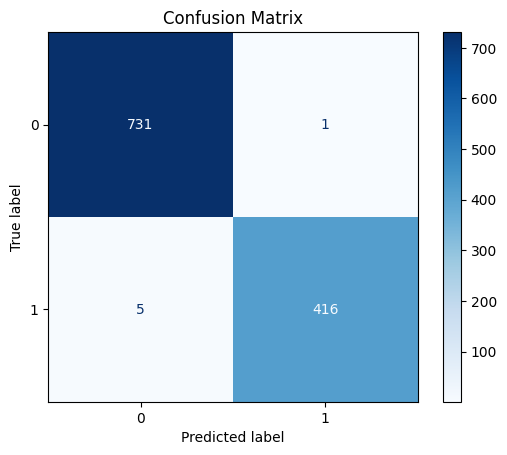

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import f1_score

# Calculate macro F1 score
macro_f1 = f1_score(y_test, y_pred, average='macro')

print("Macro F1 Score:", macro_f1, 2)
print("Rounded Macro F1 Score:", round(macro_f1, 2))

Macro F1 Score: 0.9943764510024516 2
Rounded Macro F1 Score: 0.99
